In [1]:
import numpy as np
import networkx as nx
import random

In [2]:
import numpy as np
import networkx as nx

def initialize_parameters(G, K):
    """初始化参数 pi 和 theta"""
    n = len(G.nodes)
    pi = np.random.rand(K)
    pi = pi / pi.sum()  # 归一化
    theta = np.random.rand(K, n)
    theta = theta / theta.sum(axis=1, keepdims=True)  # 归一化
    return pi, theta

def compute_q(G, pi, theta, K):
    """计算 q_ir"""
    n = len(G.nodes)
    q = np.zeros((n, K))
    for i in G.nodes:
        for r in range(K):
            product = np.prod([theta[r, j] if G.has_edge(i, j) else 1 for j in G.nodes])
            numerator = pi[r] * product
            denominator = sum(pi[s] * np.prod([theta[s, j] if G.has_edge(i, j) else 1 for j in G.nodes]) for s in range(K))
            q[i, r] = numerator / denominator
    return q

def update_parameters(G, q, K):
    """更新参数 pi 和 theta"""
    n = len(G.nodes)
    pi = np.sum(q, axis=0) / n
    theta = np.zeros((K, n))
    degrees = np.array([G.degree(i) for i in G.nodes])
    
    for r in range(K):
        for j in G.nodes:
            numerator = sum(q[i, r] if G.has_edge(i, j) else 0 for i in G.nodes)
            denominator = sum(degrees[i] * q[i, r] for i in G.nodes)
            theta[r, j] = numerator / denominator if denominator != 0 else 0
    
    return pi, theta

def maximum_likelihood_community_detection(G, K, max_iter=100, tol=1e-6):
    """最大似然估计社区发现"""
    pi, theta = initialize_parameters(G, K)
    for iteration in range(max_iter):
        q = compute_q(G, pi, theta, K)
        new_pi, new_theta = update_parameters(G, q, K)
        
        if np.allclose(pi, new_pi, atol=tol) and np.allclose(theta, new_theta, atol=tol):
            break
        
        pi, theta = new_pi, new_theta
        # print(f"Iteration {iteration + 1}")
    
    communities = np.argmax(q, axis=1)
    return communities, pi, theta



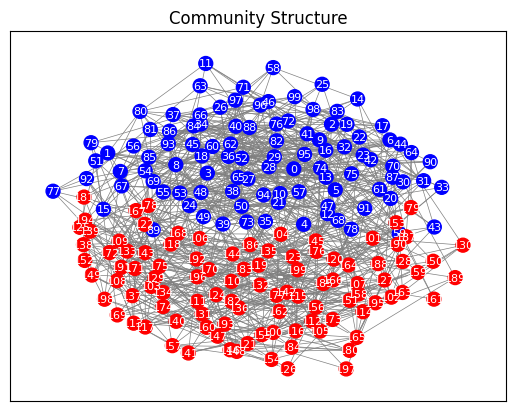

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
num_nodes = 200
num_communities = 2
nodes_per_community = num_nodes // num_communities
intra_degree = 8
inter_degree = 2

# 创建图
G = nx.Graph()

# 添加节点
G.add_nodes_from(range(num_nodes))

# 添加社区内的边
for community in range(num_communities):
    for i in range(community * nodes_per_community, (community + 1) * nodes_per_community):
        for j in range(i + 1, (community + 1) * nodes_per_community):
            if np.random.rand() < intra_degree / (nodes_per_community - 1):
                G.add_edge(i, j)

# 添加社区间的边
for i in range(nodes_per_community):
    for j in range(nodes_per_community, num_nodes):
        if np.random.rand() < inter_degree / nodes_per_community:
            G.add_edge(i, j)

# 设置节点颜色和大小
node_colors = ['blue'] * nodes_per_community + ['red'] * nodes_per_community
node_size = 100

# 设置边缘颜色和宽度
edge_colors = ['gray'] * G.number_of_edges()
edge_width = 0.5

# 使用kamada_kawai_layout布局算法
pos = nx.kamada_kawai_layout(G)

# 绘制图
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_colors)
nx.draw_networkx_edges(G, pos, width=edge_width, edge_color=edge_colors)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='w')

# 设置图的标题
plt.title('Community Structure')

# 显示图
plt.show()

In [4]:
communities, pi, theta = maximum_likelihood_community_detection(G,2)

In [5]:
pi

array([0.49739567, 0.50260433])

In [6]:
theta

array([[1.46416091e-002, 5.85839544e-003, 6.81861524e-003,
        5.85857403e-003, 7.83238605e-003, 1.06656467e-002,
        4.88207549e-003, 6.83368756e-003, 1.17345544e-002,
        1.07405877e-002, 1.46347896e-002, 5.85850239e-003,
        6.83444206e-003, 8.70981136e-003, 4.93524504e-003,
        3.90566826e-003, 7.73596779e-003, 7.81428476e-003,
        8.78601596e-003, 5.84264714e-003, 5.85365813e-003,
        8.79165808e-003, 6.81796522e-003, 5.85151703e-003,
        5.83519770e-003, 2.92925120e-003, 1.07405877e-002,
        1.40413081e-002, 1.16812798e-002, 1.17155747e-002,
        5.84173937e-003, 6.82919881e-003, 8.81811804e-003,
        2.91513104e-003, 7.81147303e-003, 5.85634033e-003,
        1.07353420e-002, 5.85850239e-003, 8.78699470e-003,
        6.83141826e-003, 7.79824407e-003, 1.07405407e-002,
        1.07405877e-002, 2.91663139e-003, 8.78775359e-003,
        1.07403462e-002, 1.07405877e-002, 6.93796501e-003,
        8.78750324e-003, 3.90607613e-003, 1.36412255e-00

In [6]:
# 统计0-99范围内的社区数量
count_community_0_in_0_99 = sum(1 for node in range(100) if communities[node] == 0)
count_community_1_in_0_99 = sum(1 for node in range(100) if communities[node] == 1)

# 统计100-199范围内的社区数量
count_community_0_in_100_199 = sum(1 for node in range(100, 200) if communities[node] == 0)
count_community_1_in_100_199 = sum(1 for node in range(100, 200) if communities[node] == 1)

print(f"0-99范围内社区0的数量: {count_community_0_in_0_99}")
print(f"0-99范围内社区1的数量: {count_community_1_in_0_99}")
print(f"100-199范围内社区0的数量: {count_community_0_in_100_199}")
print(f"100-199范围内社区1的数量: {count_community_1_in_100_199}")

0-99范围内社区0的数量: 3
0-99范围内社区1的数量: 97
100-199范围内社区0的数量: 97
100-199范围内社区1的数量: 3


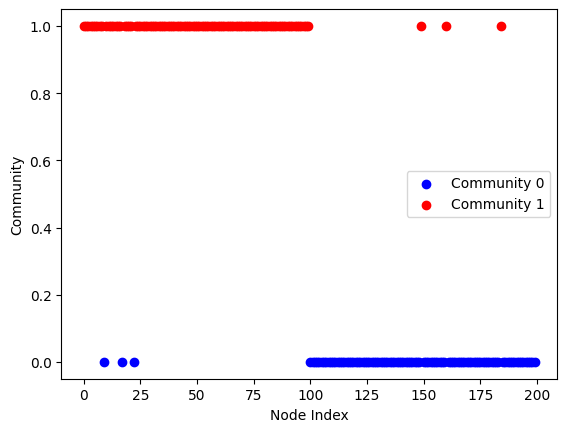

In [7]:
# 将节点按照社区分配结果分为两个列表
community_0_nodes = [node for node, community in enumerate(communities) if community == 0]
community_1_nodes = [node for node, community in enumerate(communities) if community == 1]

# 绘制散点图
plt.scatter(community_0_nodes, [0] * len(community_0_nodes), c='blue', label='Community 0')
plt.scatter(community_1_nodes, [1] * len(community_1_nodes), c='red', label='Community 1')

# 设置图例和标签
plt.legend()
plt.xlabel('Node Index')
plt.ylabel('Community')

# 显示图形
plt.show()